In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
file_path = '/Users/amiin/My Mac/Jadi/ML/My Project/CSVs/Bitcoin.csv' 
df = pd.read_csv(file_path)

df = df.iloc[::-1].reset_index(drop=True)
print(df.head())

         Date Price  Open  High   Low    Vol. Change %
0  01/01/2013  13.3  13.5  13.6  13.2  28.41K   -1.55%
1  01/02/2013  13.3  13.3  13.4  13.2  17.97K    0.00%
2  01/03/2013  13.4  13.3  13.5  13.3  18.03K    0.90%
3  01/04/2013  13.5  13.4  13.5  13.3  29.64K    0.75%
4  01/05/2013  13.4  13.5  13.6  13.3  21.33K   -0.44%


In [107]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4127 entries, 0 to 4126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4127 non-null   object
 1   Price     4127 non-null   object
 2   Open      4127 non-null   object
 3   High      4127 non-null   object
 4   Low       4127 non-null   object
 5   Vol.      4127 non-null   object
 6   Change %  4127 non-null   object
dtypes: object(7)
memory usage: 225.8+ KB
None


In [123]:
cdf = df[['Date','Open','High','Low','Vol.','Change %','Price']]
rdf = df[['Open','High','Low','Vol.','Change %','Price']]
print(cdf)

            Date      Open      High       Low     Vol. Change %     Price
0     01/01/2013      13.5      13.6      13.2   28.41K   -1.55%      13.3
1     01/02/2013      13.3      13.4      13.2   17.97K    0.00%      13.3
2     01/03/2013      13.3      13.5      13.3   18.03K    0.90%      13.4
3     01/04/2013      13.4      13.5      13.3   29.64K    0.75%      13.5
4     01/05/2013      13.5      13.6      13.3   21.33K   -0.44%      13.4
...          ...       ...       ...       ...      ...      ...       ...
4122  04/15/2024  65,696.6  66,805.1  62,379.5  118.79K   -3.48%  63,411.9
4123  04/16/2024  63,416.1  64,274.4  61,715.6  114.96K    0.62%  63,805.3
4124  04/17/2024  63,802.3  64,451.5  59,820.8  118.92K   -3.96%  61,278.9
4125  04/18/2024  61,278.9  64,092.4  60,822.3   97.38K    3.59%  63,481.4
4126  04/19/2024  63,480.5  65,441.2  59,693.3  118.98K    1.49%  64,428.5

[4127 rows x 7 columns]


In [125]:
print(rdf)

          Open      High       Low     Vol. Change %     Price
0         13.5      13.6      13.2   28.41K   -1.55%      13.3
1         13.3      13.4      13.2   17.97K    0.00%      13.3
2         13.3      13.5      13.3   18.03K    0.90%      13.4
3         13.4      13.5      13.3   29.64K    0.75%      13.5
4         13.5      13.6      13.3   21.33K   -0.44%      13.4
...        ...       ...       ...      ...      ...       ...
4122  65,696.6  66,805.1  62,379.5  118.79K   -3.48%  63,411.9
4123  63,416.1  64,274.4  61,715.6  114.96K    0.62%  63,805.3
4124  63,802.3  64,451.5  59,820.8  118.92K   -3.96%  61,278.9
4125  61,278.9  64,092.4  60,822.3   97.38K    3.59%  63,481.4
4126  63,480.5  65,441.2  59,693.3  118.98K    1.49%  64,428.5

[4127 rows x 6 columns]


In [127]:
rdf['Change %'] = rdf['Change %'].astype(str)

rdf['Change %'] = rdf['Change %'].str.rstrip('%').astype(float)

print(rdf)

          Open      High       Low     Vol.  Change %     Price
0         13.5      13.6      13.2   28.41K     -1.55      13.3
1         13.3      13.4      13.2   17.97K      0.00      13.3
2         13.3      13.5      13.3   18.03K      0.90      13.4
3         13.4      13.5      13.3   29.64K      0.75      13.5
4         13.5      13.6      13.3   21.33K     -0.44      13.4
...        ...       ...       ...      ...       ...       ...
4122  65,696.6  66,805.1  62,379.5  118.79K     -3.48  63,411.9
4123  63,416.1  64,274.4  61,715.6  114.96K      0.62  63,805.3
4124  63,802.3  64,451.5  59,820.8  118.92K     -3.96  61,278.9
4125  61,278.9  64,092.4  60,822.3   97.38K      3.59  63,481.4
4126  63,480.5  65,441.2  59,693.3  118.98K      1.49  64,428.5

[4127 rows x 6 columns]


/var/folders/rp/jsdh10cj68lf8yq9pr76clp80000gn/T/ipykernel_3363/3874726870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['Change %'] = rdf['Change %'].astype(str)
/var/folders/rp/jsdh10cj68lf8yq9pr76clp80000gn/T/ipykernel_3363/3874726870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['Change %'] = rdf['Change %'].str.rstrip('%').astype(float)


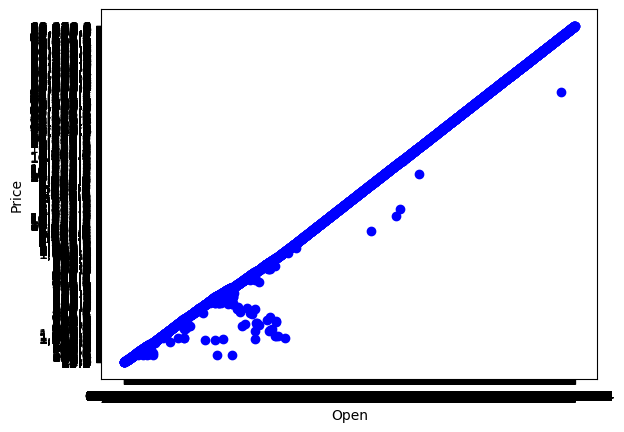

In [129]:
plt.scatter(df.Date, df.Price, color='blue')
plt.xlabel("Open")
plt.ylabel("Price")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Price', data=df)
plt.title('Scatter plot of Date vs. Price')
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Open','High','Low','Vol.','Change %']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)